In [1]:
!pip install scikit-learn
!pip install imblearn

  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ---------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data =  pd.read_csv('../Data_set/sentiment_analysis.csv')
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Start the data preperation part

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

####  When look at the 3 colum there is link upper letters,makrs and etc. So we do some basic NLP steps

#### Convert Upper to Lowercase
#### Remove links
#### Remove Punctuations (wirama lakunu)
#### Remove Numbers 
#### Remove Stopwords (Thaniyama gaththahama therumak nathi wachana)
#### Stemming (One ward can different format get base)


In [7]:
import re    # By using this package I can remove specific type of characterstic Like links
import string # This package have predine functuality. By using that we can remove that kind of pre define functions. I used to remove stopping wards
# Such as is, the,am , etc....


In [8]:
# First step convart in to lower case 
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# To get the idea of the code First I select the colum tweet 
# Then by using apply  function do all the lamda function for all the rows
# In side the lamda first split the sentence in to separate words. After separation make that in tolower case
# The join that with space 

# Then I turn all the letters in to lower case(simple) 



In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [10]:
# Next Remove the links of the tweet colum 
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

# Let s explin this code first get the tweet colum, THen split that in to single words 
# Then check each word has start of https  ^"https?:\/\/.*[\r\n]* this kind of patten if have replace  with nothing then join that remaining words 
# flags=re.MULTILINE      this argument tell "^" stat  and "$" End
#re.sub(pattern, replacement, text, flags=...)

In [11]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [12]:
# Remove funtuation  (wirama lakunu) 
string.punctuation   # Theses are the function I am going to remove 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:   # THis mean for loop go one by one in string. punctuation and check  is ther are same 
        text = text.replace(punctuation, ' ')   # If find that kind of equation then remove that value and replace with  nuthing 
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)
# Inside the remove_punctuation   in the for loop, loop the  Each punctuatinality one by one.THen If find that king of function that replace by " ".

In [14]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red ins...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app ...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile...
7916,7917,0,we would like to wish you an amazing day make...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay conne...
7919,7920,0,apple barcelona apple store bcn barcelo...


In [15]:
# Then remove the numbers of  the tweet 
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

# Acess the tweet colum, Then conart this in to string. If tere find number convart in to ''.

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_11536\1241851902.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [16]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red ins...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app ...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile...
7916,7917,0,we would like to wish you an amazing day make...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay conne...
7919,7920,0,apple barcelona apple store bcn barcelo...


In [17]:
# Remove the stopwards of the text like is, a ........
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/5 [regex]
   -------- ------------------------------- 1/5 [colorama]
   -------- ------------------------------- 1/5 [colorama]
   ---------------- ----------------------- 2/5 [tqdm]
   ---------------- ----------------------- 2/5 [tqdm]
   ---------------- ----------------------- 2/5 [tqdm]
   ---------------- ----------------------- 2/5 [tqdm]
   ------------------------ --------------- 3/5 [click]
   ------------------------ --------------- 3/5 [click]
   ------------------------ -----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk

In [18]:
# Download the stop wards
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
# OK now import the stop wards
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()   # By using "Splitlines()" We can get stop wards line by line 

In [20]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
# Remove the stop wards 
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

# Mulinma split karanawa wachane, Ita passe if condition eken balanwa meka thiyanwada kiyala swset eke EKe nathi wachan witharak thiyagena anthimata join karanwa


In [22]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,wired know george made way iphone cute daventr...
4,5,1,amazing service apple even talk question unles...


In [23]:
# Do the strmming part( that mean same ward can be in the different format) 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# THis is fuction that create for NLP

In [24]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
# Here we do first split the data in to parts(that mean in to wards). After pass all the data point inside the stem() class
# After go through the class we can get basewaord. 

In [25]:
data.head()
# So then final data set do not have upper letters,links,no puntuality, no numbers,no stopping wards and finally we only have base wards. 

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...


In [26]:
# So, the next thing is machine learning model can not identify this text values. So we need to identify thses as a numaricle value.
# For that we need to create and vocabulary. vacabalary mens we get the hole data set and get the unique value that have.
# After creating that we check each word with the each sentences. If that ward have put 1 other vise 0. That mean enery sentence become a vabalary lenght
# features. That feature is become independent fetures for predic the dependant.


#### Lets move in to the creating vocabulary and make the data set

In [26]:
from collections import Counter
vocab = Counter()

In [27]:
vocab

Counter()

In [28]:
for sentence in data['tweet']:  # In first line acess all the sentence one by one in the tweet colum
    vocab.update(sentence.split())   # Then each sentence split in to wards and pass throught the vocab finction for identify the unique and get count it


In [29]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 420,
         'app': 421,
         'beauti': 324,
         'cute': 324,
         'health': 121,
         'iger': 142,
         'iphoneonli': 131,
         'iphonesia': 137,
         'iphon': 4105,
         'final': 194,
         'transpar': 5,
         'silicon': 5,
         'case': 353,
         'thank': 267,
         'uncl': 4,
         'yay': 69,
         'soni': 821,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 503,
         'would': 153,
         'go': 211,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 136,
         'wifi': 47,
         'connect': 28,
         'wire': 8,
         'know': 107,
         'georg': 2,
         'made': 73,
         'way': 55,
         'daventri': 1,
         'home': 145,
         'amaz': 178,
         'servic': 51,
         'appl': 2913,
         'even': 110,
         'ques

In [30]:
len(vocab) # This mean our data set is goint be the data set that comtain 16229 colums for each row . Becuse next we  have to to do vectorization

15960

In [31]:
data.shape

(7920, 3)

In [ ]:
# ok now If I create data set as I said previously,Now there are dataset I got 
# 15960 colums(features) and 7920 Rows, Here is a problem that mean ourfeatures amount is way more 
# Accoding to the data points, So Here we can faced overfitting problem. To over come this we have to 
# Reduce the feature list
# To overcome this I can do feature selection or Ican do remove the features that is less than 10 

In [32]:
tokens = [key for key in vocab if vocab[key] > 10]  # Here above dataset is in the dictionary so we first acess the 
# Key and check the value if it is greater than 10 we add it into the token

In [33]:
len(tokens)  # So now over data set is become less now, it is kind good.  
# This token is more valuble because when we input the data by using this vocabalary if is convart in to numarical 

1169

In [34]:
# Now we save this wards in alocal location, 
def save_vocabulary(lines, filename):   # There are two argument lines and filename
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt') # Call the function
# By using this data set we can convart this data in to train and test 

In [35]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...


#### Now move on to the feature enginearing part


In [36]:
y = data['label']
x = data['tweet']
x.head(),y.head()

(0    fingerprint pregnanc test android app beauti c...
 1    final transpar silicon case thank uncl yay son...
 2    love would go talk makememori unplug relax iph...
 3    wire know georg made way iphon cute daventri home
 4    amaz servic appl even talk question unless pay...
 Name: tweet, dtype: object,
 0    0
 1    0
 2    0
 3    0
 4    1
 Name: label, dtype: int64)

In [37]:
# now devide data set into testand train part 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)


In [38]:
x_train.shape,x_test.shape

((6336,), (1584,))

In [39]:
# Ok before build the model I have to concert the catergarical varible in to the numarical
def vectorization(ds, vocabulary):  # enter the data set and vobulary 
    vectorized_lst = []   # create empty set after fill this and got as output 

    for sentence in ds:     
        sentence_lst = np.zeros(len(vocabulary))  # By going one by one of and our sentence and make the array have zeros

        for i in range (len(vocabulary)):   # Then we check the sentence and vocabiulary,
            if vocabulary[i] in sentence.split():  # If sentence have that ward put 1 otherwise put zero
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)  # After one sentence append that into the vectorized lst 

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return(vectorized_lst_new)
            

In [40]:
# Convart the train_data set into vectorization, Now our data set is vectorized
vectorizes_x_train = vectorization(x_train,tokens)

In [41]:
# Convart the test_data_set into numarical
vectorizes_x_test = vectorization(x_test,tokens)

In [42]:
y_train.value_counts()

label
0    4732
1    1604
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x138d0ad3f80>,
 [Text(-0.77006608524448, 0.7854923451926452, 'Positive'),
  Text(0.7700661539144015, -0.7854922778713243, 'Negative')])

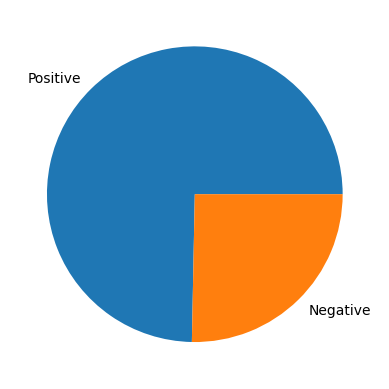

In [43]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),labels = ['Positive','Negative'])
# In such kind of binary calssification in dat set is not balance this model can be bias to the class that 
# Have mode data points So, I have to overcome this.., For that we have to balance this 

####  So here have to haddle this, unbalanced dataset.

In [44]:
# For haddle this I used SMOTE technique for this 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorizes_x_train,y_train)
vectorized_x_train_smote.shape , y_train_smote.shape

((9464, 1169), (9464,))

In [45]:
y_train_smote.value_counts()

label
0    4732
1    4732
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x138d0b7cda0>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Negative')])

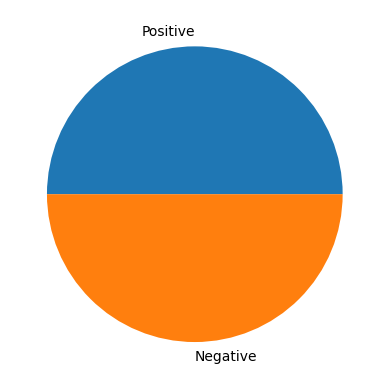

In [46]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),labels = ['Positive','Negative'])
# Ok now , Train data set is balanced, 

In [ ]:
# So here we can used to build the model
vectorized_x_train_smote
y_train_smote 
# For test we used 
vectorizes_x_test
y_test
# Ok this is the end of the feature enginearing parts ok now letsmove on to the model building part

### Model building and  evaluating the model 

In [47]:
# First I import the  all the algorithams I amgoing to used hear 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [48]:
# Then I am creating function to evaluate this each algoritham 
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
def training_scores(y_act,y_pred):
    act = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Score:\n\tAccuracy = {act}\n\tPrecision = {pr}\n\tRecall = {rec}\n\t F1-Score = {f1}')

def validation(y_act,y_pred):
    act = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Testing Score:\n\tAccuracy = {act}\n\tPrecision = {pr}\n\tRecall = {rec}\n\t F1-Score = {f1}')



#### Logistic Regression

In [49]:
#### Build the model by using Logistic regression

lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

# Predict the values for trining data set and check the training accuracy
y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)

# Predict the values for testing data set and check the training accuracy
y_test_predict = lr.predict(vectorizes_x_test)
validation(y_test,y_test_predict)
# THis is kind a overfitting to avoid that we can reduce some features 

Training Score:
	Accuracy = 0.945
	Precision = 0.918
	Recall = 0.977
	 F1-Score = 0.947
Testing Score:
	Accuracy = 0.866
	Precision = 0.705
	Recall = 0.855
	 F1-Score = 0.773


#### Naive Bayes

In [50]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

# Predict the values for trining data set and check the training accuracy
y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)

# Predict the values for testing data set and check the training accuracy
y_test_predict = mnb.predict(vectorizes_x_test)
validation(y_test,y_test_predict)
# Up to this stage Naive Logistic regresion is kindly good. 

Training Score:
	Accuracy = 0.907
	Precision = 0.873
	Recall = 0.954
	 F1-Score = 0.912
Testing Score:
	Accuracy = 0.86
	Precision = 0.678
	Recall = 0.908
	 F1-Score = 0.776


#### Decesion tree 

In [51]:
DT = DecisionTreeClassifier()
DT.fit(vectorized_x_train_smote,y_train_smote)

# Predict the values for trining data set and check the training accuracy
y_train_pred = DT.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)

# Predict the values for testing data set and check the training accuracy
y_test_predict = DT.predict(vectorizes_x_test)
validation(y_test,y_test_predict)
# This is overfitting , here problem could be our features are too much or recodeds are limited 

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	 F1-Score = 1.0
Testing Score:
	Accuracy = 0.819
	Precision = 0.658
	Recall = 0.666
	 F1-Score = 0.662


#### Randam forest 

In [52]:
RF = RandomForestClassifier()
RF.fit(vectorized_x_train_smote,y_train_smote)

# Predict the values for trining data set and check the training accuracy
y_train_pred = RF.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)

# Predict the values for testing data set and check the training accuracy
y_test_predict = RF.predict(vectorizes_x_test)
validation(y_test,y_test_predict)



Training Score:
	Accuracy = 1.0
	Precision = 0.999
	Recall = 1.0
	 F1-Score = 1.0
Testing Score:
	Accuracy = 0.864
	Precision = 0.746
	Recall = 0.739
	 F1-Score = 0.743


#### SVM 

In [91]:
SV = SVC()
SV.fit(vectorized_x_train_smote,y_train_smote)

# Predict the values for trining data set and check the training accuracy
y_train_pred = SV.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)

# Predict the values for testing data set and check the training accuracy
y_test_predict = SV.predict(vectorizes_x_test)
validation(y_test,y_test_predict)

Training Score:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.996
	 F1-Score = 0.979
Testing Score:
	Accuracy = 0.881
	Precision = 0.756
	Recall = 0.807
	 F1-Score = 0.78


In [ ]:
# I can develop the model future. Hyper parameteric tuning. Up to go ahead Do this 

In [53]:
import pickle 
with open('../static/model/model.pickle','wb') as f:
    pickle.dump(mnb, file)

TypeError: write() argument must be str, not bytes